In [1]:
#TODO POSSIBLE : Make A Zipcode Dictionary that refers to their code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import pickle
from sklearn.preprocessing import StandardScaler

In [3]:
from config import db_password

In [4]:
# Name the SQL database your are accessing
database = "RealLeads"

In [5]:
# Make your local connection to the database in PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database=database,
    user="postgres",
    password=db_password)

In [6]:
# Table selection Function
def table_select(table_name):
    table =f"select * from \"{table_name}\""
    dataFrame = pd.read_sql(table, conn)
    return dataFrame

In [7]:
# Names of the tables to be imported
id_table_df = table_select("id_table")
broker_df = table_select("broker_data_clean")
lat_lng_df = table_select("lat_lng_clean")
mortgage_df = table_select("mortgage_data_clean")
property_char_df = table_select("prop_charac_clean")
#public_rec_df = table_select("pub_rec_clean")
sales_data_df = table_select("sales_data_clean")

In [8]:
public_rec_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Pub_Rec_clean.csv")


In [9]:
ml_Temp = pd.read_csv("../Resources/ml_Data_Cleaned_Supervised_Learning.csv")

In [10]:
ml_df = pd.read_csv("../Resources/ml_DataFrame_No_NAN.csv")

In [11]:
ml_Temp.head()

,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
0,330000.0,13,461,4,2,1,0.26,2099.0,2099.0,0.0,4.0,2.0,27,2,12,2,2,205,87
1,215500.0,13,399,4,1,3,0.06,1927.0,1575.0,352.0,3.0,2.0,27,2,12,2,1,43,105
2,200000.0,13,618,4,1,3,0.05,1150.0,1150.0,0.0,2.0,2.0,27,2,12,2,1,291,114
3,219900.0,13,190,4,2,3,0.05,1425.0,1425.0,0.0,2.0,3.0,27,2,12,2,2,270,114
4,195000.0,13,546,4,1,1,0.14,0.0,0.0,0.0,4.0,3.0,12,1,12,2,2,237,83


In [12]:
ml_df.head()

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
0,DENC518086,330000.0,19808,SHERWOOD PARK II,Red Clay Consolidated,Yes,Detached,0.26,2099.0,2099.0,0.0,4.0,2.0,"Main,Upper1",Yes,Public,Yes,Yes,"BrickFront,VinylSiding",1958
1,DENC518982,215500.0,19808,PEPPER RIDGE,Red Clay Consolidated,No,Interior Row/Townhouse,0.06,1927.0,1575.0,352.0,3.0,2.0,"Main,Upper1",Yes,Public,Yes,No,"AluminumSiding,Brick,VinylSiding",1976
2,DENC512992,200000.0,19808,WOODMILL,Red Clay Consolidated,No,Interior Row/Townhouse,0.05,1150.0,1150.0,0.0,2.0,2.0,"Main,Upper1",Yes,Public,Yes,No,VinylSiding,1985
3,DENC512104,219900.0,19808,FAIRWAY FALLS,Red Clay Consolidated,Yes,Interior Row/Townhouse,0.05,1425.0,1425.0,0.0,2.0,3.0,"Main,Upper1",Yes,Public,Yes,Yes,Other,1985
4,DENC506356,195000.0,19808,WASHINGTON HEIGHTS,Red Clay Consolidated,No,Detached,0.14,0.0,0.0,0.0,4.0,3.0,"Lower1,Main,Upper1",No,Public,Yes,Yes,"Concrete,Stucco",1954


In [13]:
ml_df.columns

Index(['MLSNumber', 'Orig_List_Price', 'Zip_Code', 'Subdivision',
       'School_District', 'HOA_YN', 'Structure_Type', 'Acres', 'InteriorSqFt',
       'AboveGradeSqFt', 'BelowGradeSqFt', 'Bedrooms', 'Baths',
       'NumberofStories', 'Central_Air_YN', 'Water', 'Basement_YN',
       'Garage_YN', 'ExteriorMaterial', 'YearBuilt'],
      dtype='object')

In [14]:
ml_Temp.columns

Index(['Orig_List_Price', 'Zip_Code', 'Subdivision', 'School_District',
       'HOA_YN', 'Structure_Type', 'Acres', 'InteriorSqFt', 'AboveGradeSqFt',
       'BelowGradeSqFt', 'Bedrooms', 'Baths', 'NumberofStories',
       'Central_Air_YN', 'Water', 'Basement_YN', 'Garage_YN',
       'ExteriorMaterial', 'YearBuilt'],
      dtype='object')

In [15]:
zipcode_dict = dict(zip(ml_df.Zip_Code, ml_Temp.Zip_Code))
zipcode_dict.items()

dict_items([(19808, 13), (19807, 12), (19806, 11), (19805, 10), (19804, 9), (19803, 8), (19802, 7), (19801, 6), (19720, 3), (19736, 5), (19732, 4), (19711, 2), (19707, 1)])

In [16]:
#Test Loading a machine learning model

In [17]:
filename = 'RandomForestRegressor_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
res = loaded_model.predict(ml_Temp.drop(columns="Orig_List_Price"))

In [18]:
res

array([330013.99      , 224268.25      , 207087.        , ...,
       514999.99      , 580620.98      , 350704.33333333])

In [19]:
X = ml_Temp.drop(columns="Orig_List_Price")
y = ml_Temp["Orig_List_Price"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(3934, 18)

In [21]:
mod_score = loaded_model.score(X_test,y_test)

In [22]:
mod_score

0.9120364882716853

# TESTING SCALING ON MULTIPLE MODELS

In [23]:
data_scaler = StandardScaler()

In [24]:
ml_data_scaled = data_scaler.fit_transform(ml_Temp.drop(columns="Orig_List_Price"))

In [25]:
ml_data_scaled

array([[ 1.41954626,  0.73664285,  0.83424744, ...,  0.80815175,
         0.74901169, -0.14994135],
       [ 1.41954626,  0.38938688,  0.83424744, ..., -1.23739138,
        -1.22644398,  0.50628094],
       [ 1.41954626,  1.61598458,  0.83424744, ..., -1.23739138,
         1.79771038,  0.83439208],
       ...,
       [-1.42118285,  0.88786722,  0.83424744, ...,  0.80815175,
        -1.22644398,  0.98021926],
       [-1.42118285,  0.50140493,  0.83424744, ...,  0.80815175,
        -0.03141524,  1.08958964],
       [-1.42118285, -1.83417152,  0.83424744, ...,  0.80815175,
         0.60268164,  1.45415758]])

In [26]:
np.mean(ml_data_scaled[:,0])

0.0

In [27]:
np.std(ml_data_scaled[:,0])

1.0000000000000002

In [28]:
#Scaling Training Data
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

#Scaliing the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Test 1 : RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr_model = RandomForestRegressor(n_jobs=-1 , random_state=40)

rfr_model = rfr_model.fit(X_train_scaled,y_train)

In [39]:
rfr_pred = rfr_model.predict(X_test_scaled)

In [40]:
rfr_pred

array([252180.66666667, 294613.48      , 347330.94      , 375732.99      ,
       331533.        , 251925.9       , 345429.92      , 267055.        ,
       339160.        , 341691.5       , 211094.3       , 260747.59666667,
       500852.96      , 291067.        , 369831.        , 488683.        ,
       450892.        , 286280.97      , 208607.        , 283039.95      ,
       247835.        , 477560.95      , 287287.15666667, 387010.89      ,
       251102.        , 263964.        , 273620.98      , 346253.        ,
       233825.33      , 209248.8       , 220831.5       , 298541.66666667,
       229092.        , 278492.        , 214932.89      , 367258.98      ,
       401867.        , 229443.95      , 304191.98      , 281909.5       ,
       442514.85      , 368212.63666667, 239356.98      , 243205.91      ,
       258886.99      , 236401.        , 325772.83      , 349089.        ,
       402370.28      , 245000.97      , 258121.9       , 319544.        ,
       230649.56666667, 2

In [41]:
rfr_model.score(X_test_scaled,y_test)

0.7502608760686673

In [42]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error ,r2_score
def show_score(model):
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_test_scaled)
    scores={"Training MAE" : mean_absolute_error(y_train,train_pred),
            "Valid MAE" : mean_absolute_error(y_test, val_pred),
            "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_pred)),
            "Valid RMSLE" :  np.sqrt(mean_squared_log_error(y_test,val_pred)),
            "Training R^2" : r2_score(y_train, train_pred),
            "Valid R^2" : r2_score(y_test,val_pred)
           }
    return scores

In [43]:
show_score(rfr_model)

{'Training MAE': 13980.207375384318,
 'Valid MAE': 36191.55754065041,
 'Training RMSLE': 0.059310705683357653,
 'Valid RMSLE': 0.1479598434134952,
 'Training R^2': 0.9317341276848287,
 'Valid R^2': 0.7502608760686673}

In [54]:
filename = 'RandomForestRegressor_Scal_model.sav'
pickle.dump(rfr_model, open(filename, 'wb'))

## To load model later:
```
 //load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
```

#### Attaching Prediction to original model to compare

In [44]:
test_pred_unscaled = loaded_model.predict(ml_Temp.drop(columns="Orig_List_Price"))

In [45]:
test_pred = rfr_model.predict(ml_data_scaled)

In [46]:
pred_df = pd.DataFrame.copy(ml_df ,deep=True)

In [47]:
pred_df["Pred_List_Price_RFR_Scaled"] = test_pred

In [48]:
pred_df["Pred_List_Price_RFR_Unscaled"] = test_pred_unscaled

In [49]:
delta_df = pd.DataFrame.copy(pred_df[["MLSNumber","Zip_Code","Orig_List_Price","Pred_List_Price_RFR_Unscaled","Pred_List_Price_RFR_Scaled" ]],deep=True)

In [50]:
delta_df["Price_Diff_RFR_Unscaled "] = delta_df["Orig_List_Price"] - delta_df["Pred_List_Price_RFR_Unscaled"]

In [51]:
delta_df["Price_Diff_RFR_Scaled "] = delta_df["Orig_List_Price"] - delta_df["Pred_List_Price_RFR_Scaled"]

In [52]:
delta_df.sample(10)

,MLSNumber,Zip_Code,Orig_List_Price,Pred_List_Price_RFR_Unscaled,Pred_List_Price_RFR_Scaled,Price_Diff_RFR_Unscaled,Price_Diff_RFR_Scaled
4766,DENC508258,19707,535000.0,530744.80,523916.75,4255.20,11083.25
333,DENC524252,19808,375000.0,372607.00,375527.00,2393.00,-527.00
1948,DENC2005068,19804,234900.0,228505.99,225364.35,6394.01,9535.65
1053,DENC507926,19806,525000.0,461728.96,381743.00,63271.04,143257.00
4911,DENC2004562,19707,635000.0,591537.99,591701.00,43462.01,43299.00
1546,DENC526644,19805,215000.0,234520.00,308182.98,-19520.00,-93182.98
335,DENC509556,19808,365000.0,349777.98,318951.89,15222.02,46048.11
4471,DENC525614,19711,375000.0,361311.00,357989.00,13689.00,17011.00
3205,DENC508994,19720,294900.0,317850.45,338747.99,-22950.45,-43847.99
2708,DENC2014564,19802,199000.0,206343.00,211844.00,-7343.00,-12844.00


In [56]:
#delta_df.to_csv("../Resources/randomforest_prediction.csv",index=False)

In [57]:
def feature_plot(columns, importance, n=10):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    return df

In [59]:
pf = feature_plot(X_train.columns, rfr_model.feature_importances_)

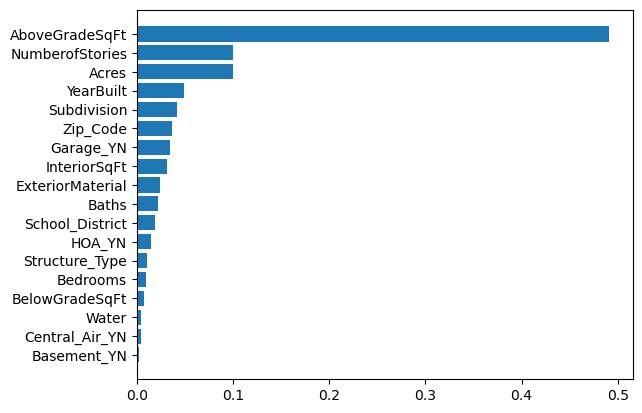

In [60]:
fig , ax = plt.subplots()
ax.barh(pf["features"] , pf["feature_importances"])
ax.invert_yaxis()

In [71]:
pf

,features,feature_importances
0,AboveGradeSqFt,0.491210
1,NumberofStories,0.100167
2,Acres,0.099511
3,YearBuilt,0.048522
4,Subdivision,0.041798
5,Zip_Code,0.035916
6,Garage_YN,0.034725
7,InteriorSqFt,0.031251
8,ExteriorMaterial,0.023781
9,Baths,0.021748


## Delta transformation


In [76]:
zipcode_price_table = delta_df[["Orig_List_Price" , "Pred_List_Price_RFR_Unscaled","Pred_List_Price_RFR_Scaled"]].groupby(delta_df['Zip_Code']).mean()

In [77]:
zipcode_price_table

,Orig_List_Price,Pred_List_Price_RFR_Unscaled,Pred_List_Price_RFR_Scaled
Zip_Code,,,
19707,434042.989091,428290.539663,434512.721479
19711,359394.520101,360507.970379,365734.074506
19720,275412.582503,279554.071798,286382.239500
19732,580000.000000,491052.990000,457743.610000
19736,325000.000000,312520.660000,308262.200000
19801,277116.125000,277881.388760,279961.370278
19802,275578.648536,280736.049833,291996.678940
19803,396896.794286,390114.185038,395115.382825
19804,250353.475783,256462.996296,262391.690503


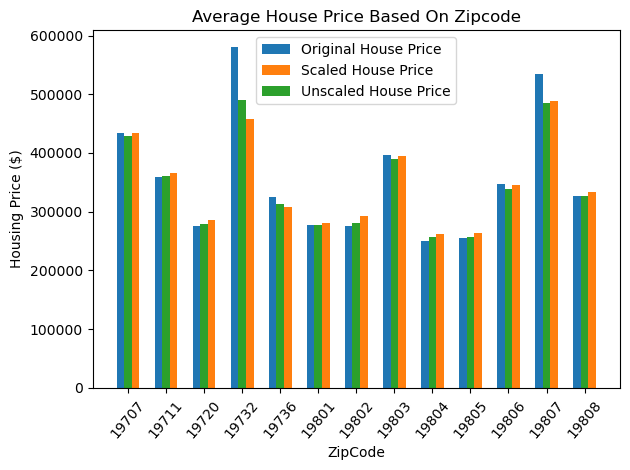

In [98]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2,zipcode_price_table.Orig_List_Price,0.2,label="Original House Price")
plt.bar(X_axis + 0.2,zipcode_price_table.Pred_List_Price_RFR_Scaled,0.2,label="Scaled House Price")
plt.bar(X_axis,zipcode_price_table.Pred_List_Price_RFR_Unscaled,0.2,label="Unscaled House Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("Housing Price ($)")
plt.title("Average House Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/average_house_price_zipcode.png" ,dpi=400)
plt.show()
